##### Copyright 2018 The TensorFlow Authors.

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)


Num GPUs Available:  2
2 Physical GPUs, 1 Logical GPU


In [4]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [5]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [9]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [10]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [12]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [13]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

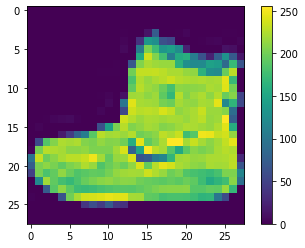

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

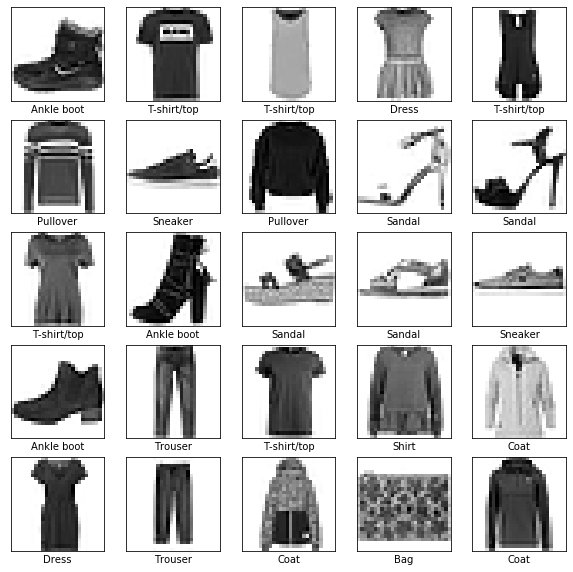

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
train_images = train_images[...,None]
test_images = test_images[...,None]

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(10)
])

In [19]:
"""
model = keras.Sequential([
    keras.layers.Conv2D(4, 5,input_shape=(28, 28, 1), strides=2, activation='sigmoid'),
    keras.layers.Conv2D(16, 5, activation='sigmoid'),
    keras.layers.Conv2D(64, 5, activation='sigmoid'),
    
    #keras.layers.Dense(128, activation='sigmoid'),
    #keras.layers.Dense(92, activation='sigmoid'),
    #keras.layers.Dense(64, activation='sigmoid'),
    #keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='sigmoid')
])
"""
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [21]:
input1 = model.input 
output1 = [layer.output for layer in model.layers]# all layer outputs

K = tf.keras.backend

fun = K.function([input1], output1)# evaluation function

# Testing

t = test_images[0:100]

layer_outputs = fun([t, 1.])

print([np.sum(i) for i in layer_outputs]) # printing the outputs of layers

[22957.568, 1670.6044, 770.54596, 45.6467]


In [22]:
from collections import Counter

class CustomCallback(keras.callbacks.Callback):
    
    def calc_mutual_information(self, hidden):
        
        hidden = hidden.reshape(len(hidden),-1)
        
        y_values = self.test_labels[:2500]
            
        n_neurons = hidden.shape[1]

        # discretization 
        n_bins = 2
        bins = np.linspace(0, 1, n_bins+1)
        indices = np.digitize(hidden, bins)

        # initialize pdfs
        pdf_x = Counter(); pdf_y = Counter(); pdf_t = Counter(); pdf_xt = Counter(); pdf_yt = Counter()

        
        for i in range(2500):
            pdf_x[i] += 1/float(2500)
            pdf_y[y_values[i]] += 1/float(2500)      
            pdf_xt[(i,)+tuple(indices[i,:])] += 1/float(2500)
            pdf_yt[(y_values[i],)+tuple(indices[i,:])] += 1/float(2500)
            pdf_t[tuple(indices[i,:])] += 1/float(2500)

        # calcuate encoder mutual information I(X;T)
        mi_xt = 0
        for i in pdf_xt:
            # P(x,t), P(x) and P(t)
            p_xt = pdf_xt[i]; p_x = pdf_x[i[0]]; p_t = pdf_t[i[1:]]
            # I(X;T)
            mi_xt += p_xt * np.log(p_xt / p_x / p_t)

        # calculate decoder mutual information I(T;Y)
        mi_ty = 0
        for i in pdf_yt:
            # P(t,y), P(t) and P(y)
            p_yt = pdf_yt[i]; p_t = pdf_t[i[1:]]; p_y = pdf_y[i[0]]
            # I(X;T)
            mi_ty += p_yt * np.log(p_yt / p_t / p_y)

        return mi_xt, mi_ty
        
    def get_mutual_information(self):
        hiddens = self.get_output_of_layers()
        
        mi_xt_list = []; mi_ty_list = []
        for hidden in hiddens:
            mi_xt, mi_ty = self.calc_mutual_information(hidden)
            mi_xt_list.append(mi_xt)
            mi_ty_list.append(mi_ty)
        return mi_xt_list, mi_ty_list
        
        
    def get_output_of_layers(self):
        input1 = model.input 
        output1 = [layer.output for layer in model.layers[:-1]]# all layer outputs

        K = tf.keras.backend

        fun = K.function([input1], output1)# evaluation function

        # Testing

        t = self.test_images[:2500]
        return fun([t])
        
    
    #def on_epoch_end(self, epoch, logs=None):
        #keys = list(logs.keys())
        
        #mi_xt, mi_ty = self.get_mutual_information(layer_outputs, self.test_labels[0:500])
        #mi_xt, mi_ty = self.get_mutual_information()
        #print(mi_xt, mi_ty)
        #print(mi_xt, mi_ty)
        
        #print([o.shape for o in layer_outputs]) # printing the outputs of layers
        
        #print("End epoch {} of training; got log keys: {}".format(epoch, keys))
    
    def on_train_batch_end(self, batch, logs=None):
        if batch % 50 == 0:
            mi_xt, mi_ty = self.get_mutual_information()
            self.hist_mi_xt.append(mi_xt)
            self.hist_mi_ty.append(mi_ty)
            print(mi_xt, mi_ty)
    def on_train_begin(self, logs=None):
        self.hist_mi_xt = []
        self.hist_mi_ty = []
    def on_train_end(self, logs=None):
        self.hist_mi_xt = np.array(self.hist_mi_xt)
        self.hist_mi_ty = np.array(self.hist_mi_ty)
        
callback = CustomCallback()
callback.test_labels = test_labels
callback.test_images = test_images


In [23]:
model.fit(train_images, train_labels, epochs=50, callbacks=[callback])

Epoch 1/50
[7.824046010855979, 7.517847929681876, 1.5586997115260437] [2.3020219292788853, 2.226092716690013, 0.37642868372654387]
1875/1875 [==============================] - 38s 20ms/step - loss: 1.0040 - accuracy: 0.7079
Epoch 2/50
[7.824046010855979, 5.850499268470033, 3.888656200004123] [2.3020219292788853, 2.1508118810429924, 1.9091637435090305]


1875/1875 [==============================] - 37s 20ms/step - loss: 0.5001 - accuracy: 0.8367
Epoch 3/50
[7.824046010855979, 6.45125485195303, 4.065130434768167] [2.3020219292788853, 2.2397901044128794, 1.9737026299298948]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.4199 - accuracy: 0.8555
Epoch 4/50
[7.824046010855979, 6.576805854766232, 4.232497099709476] [2.3020219292788853, 2.2286466374104212, 1.9888023128542234]


1875/1875 [==============================] - 38s 20ms/step - loss: 0.3865 - accuracy: 0.8649
Epoch 5/50
[7.824046010855979, 6.788148843389154, 4.375532293832583] [2.3020219292788853, 2.23589195994387, 2.0368141773246906]


1875/1875 [==============================] - 37s 20ms/step - loss: 0.3648 - accuracy: 0.8716
Epoch 6/50
[7.824046010855979, 6.939705050847656, 4.3741640661277525] [2.3020219292788853, 2.2616142508772334, 2.0303951152645925]


1875/1875 [==============================] - 38s 20ms/step - loss: 0.3489 - accuracy: 0.8763
Epoch 7/50
[7.824046010855979, 7.030757746025281, 4.390270272001541] [2.3020219292788853, 2.263085759964443, 2.025540348240247]


1875/1875 [==============================] - 37s 20ms/step - loss: 0.3374 - accuracy: 0.8792
Epoch 8/50
[7.824046010855979, 7.164513389913365, 4.523061309266142] [2.3020219292788853, 2.262588297631902, 2.0489169783931818]


1875/1875 [==============================] - 37s 20ms/step - loss: 0.3264 - accuracy: 0.8834
Epoch 9/50
[7.824046010855979, 7.152856083773116, 4.64654981415373] [2.3020219292788853, 2.267642500302159, 2.0796984431377536]


1875/1875 [==============================] - 37s 20ms/step - loss: 0.3181 - accuracy: 0.8861
Epoch 10/50
[7.824046010855979, 7.165622141445454, 4.6040251621902994] [2.3020219292788853, 2.265912571625872, 2.0571474011152087]


1875/1875 [==============================] - 38s 20ms/step - loss: 0.3110 - accuracy: 0.8896
Epoch 11/50
[7.824046010855979, 7.232836431545737, 4.659925981808274] [2.3020219292788853, 2.2778628588058534, 2.0556735344020094]


1875/1875 [==============================] - 38s 20ms/step - loss: 0.3044 - accuracy: 0.8907
Epoch 12/50
[7.824046010855979, 7.291104013731938, 4.70507620977408] [2.3020219292788853, 2.2777482269258953, 2.0667446407293575]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2980 - accuracy: 0.8929
Epoch 13/50
[7.824046010855979, 7.19811342582946, 4.733492790260416] [2.3020219292788853, 2.2712229241550794, 2.0828139586807515]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2930 - accuracy: 0.8941
Epoch 14/50
[7.824046010855979, 7.242660083739799, 4.677201188505604] [2.3020219292788853, 2.2787869831837573, 2.061119075957152]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2869 - accuracy: 0.8962
Epoch 15/50
[7.824046010855979, 7.236438949449276, 4.71442396632395] [2.3020219292788853, 2.274739805450453, 2.0843336119060196]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2822 - accuracy: 0.8983
Epoch 16/50
[7.824046010855979, 7.278644833350569, 4.732947634484122] [2.3020219292788853, 2.2779852147710167, 2.076631949802266]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2798 - accuracy: 0.8987
Epoch 17/50
[7.824046010855979, 7.304442309658938, 4.730068537451257] [2.3020219292788853, 2.2794162197477985, 2.075129494726801]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2738 - accuracy: 0.9016
Epoch 18/50
[7.824046010855979, 7.333875156677158, 4.837221254812649] [2.3020219292788853, 2.2794084956626004, 2.09975197009007]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2707 - accuracy: 0.9022
Epoch 19/50
[7.824046010855979, 7.331606205884743, 4.808269143385923] [2.3020219292788853, 2.2800119893441377, 2.0928786307536793]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2668 - accuracy: 0.9039
Epoch 20/50
[7.824046010855979, 7.379621820486673, 4.798411358017351] [2.3020219292788853, 2.277679286486385, 2.0912765169275507]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2634 - accuracy: 0.9057
Epoch 21/50
[7.824046010855979, 7.376171885279203, 4.778454185258452] [2.3020219292788853, 2.2726396508492615, 2.0820396017953096]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2600 - accuracy: 0.9064
Epoch 22/50
[7.824046010855979, 7.387455736414689, 4.82658462362718] [2.3020219292788853, 2.2780212662463533, 2.0917879101706056]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2579 - accuracy: 0.9064
Epoch 23/50
[7.824046010855979, 7.451043975651213, 4.8543014308879995] [2.3020219292788853, 2.2839277033810346, 2.079290882292521]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2543 - accuracy: 0.9074
Epoch 24/50
[7.824046010855979, 7.404356460750121, 4.880556542786462] [2.3020219292788853, 2.2858952232494274, 2.099211892105039]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2504 - accuracy: 0.9096
Epoch 25/50
[7.824046010855979, 7.468822870485101, 4.856178275050614] [2.3020219292788853, 2.2803841356307077, 2.0943582064183532]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2473 - accuracy: 0.9108
Epoch 26/50
[7.824046010855979, 7.413462798040077, 4.902609164884528] [2.3020219292788853, 2.2798884325173896, 2.105961659908187]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2450 - accuracy: 0.9115
Epoch 27/50
[7.824046010855979, 7.418437875129486, 4.897865711048798] [2.3020219292788853, 2.2885274531536717, 2.1135929758674323]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2427 - accuracy: 0.9126
Epoch 28/50
[7.824046010855979, 7.465375491688294, 4.958261556569487] [2.3020219292788853, 2.2844597329144185, 2.1076197896671927]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2398 - accuracy: 0.9140
Epoch 29/50
[7.824046010855979, 7.432292433945242, 4.888558496410993] [2.3020219292788853, 2.27962824144288, 2.113887554942362]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2378 - accuracy: 0.9141
Epoch 30/50
[7.824046010855979, 7.462141994405883, 4.941710034122717] [2.3020219292788853, 2.2773701194747833, 2.0987105635247865]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2347 - accuracy: 0.9153
Epoch 31/50
[7.824046010855979, 7.487464692530775, 4.896708935017989] [2.3020219292788853, 2.2877752377664127, 2.109556405689696]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2318 - accuracy: 0.9160
Epoch 32/50
[7.824046010855979, 7.474048084886345, 4.922209308077295] [2.3020219292788853, 2.2858398460741958, 2.0874199588922813]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2302 - accuracy: 0.9162
Epoch 33/50
[7.824046010855979, 7.477908195804647, 5.008125658212193] [2.3020219292788853, 2.284420442712109, 2.1158209988350283]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2280 - accuracy: 0.9179
Epoch 34/50
[7.824046010855979, 7.470620788651068, 4.980496509854042] [2.3020219292788853, 2.2887375131991674, 2.1099001415166665]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2255 - accuracy: 0.9200
Epoch 35/50
[7.824046010855979, 7.483589901163182, 5.048371457805206] [2.3020219292788853, 2.2905129758749023, 2.1332353563513746]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2237 - accuracy: 0.9189
Epoch 36/50
[7.824046010855979, 7.479054592226813, 5.024619521675062] [2.3020219292788853, 2.2845840505291624, 2.113270196072504]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2219 - accuracy: 0.9200
Epoch 37/50
[7.824046010855979, 7.459708999366297, 5.036875450679867] [2.3020219292788853, 2.285239636889297, 2.1051879051304168]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2202 - accuracy: 0.9201
Epoch 38/50
[7.824046010855979, 7.504781483941817, 5.0338405903629795] [2.3020219292788853, 2.2864292144323946, 2.1038535667914124]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2181 - accuracy: 0.9208
Epoch 39/50
[7.824046010855979, 7.5336105125230395, 5.0412130600153215] [2.3020219292788853, 2.2837576943258404, 2.1049043983329048]


1875/1875 [==============================] - 41s 22ms/step - loss: 0.2158 - accuracy: 0.9217
Epoch 40/50
[7.824046010855979, 7.523705309491025, 5.093494872793125] [2.3020219292788853, 2.2857593040199915, 2.1128656595545667]


1875/1875 [==============================] - 40s 22ms/step - loss: 0.2149 - accuracy: 0.9221
Epoch 41/50
[7.824046010855979, 7.530070144014489, 5.078034034703749] [2.3020219292788853, 2.2866662022775173, 2.1173283417209845]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2126 - accuracy: 0.9232
Epoch 42/50
[7.824046010855979, 7.526366872647881, 5.064965706710288] [2.3020219292788853, 2.2912900624656487, 2.098346459227513]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2092 - accuracy: 0.9247
Epoch 43/50
[7.824046010855979, 7.552561940385345, 5.081945977876047] [2.3020219292788853, 2.2872941000500373, 2.1173674101829456]


1875/1875 [==============================] - 41s 22ms/step - loss: 0.2087 - accuracy: 0.9244
Epoch 44/50
[7.824046010855979, 7.547120487355044, 5.081868602848522] [2.3020219292788853, 2.2907848143337746, 2.0992034690065804]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2068 - accuracy: 0.9245
Epoch 45/50
[7.824046010855979, 7.530100624371747, 5.080794995577721] [2.3020219292788853, 2.2822300603219317, 2.113773172965086]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2043 - accuracy: 0.9269
Epoch 46/50
[7.824046010855979, 7.534741354781354, 5.068854111116222] [2.3020219292788853, 2.286589339023883, 2.1225182038321235]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2034 - accuracy: 0.9268
Epoch 47/50
[7.824046010855979, 7.5477715300531845, 5.122626489523357] [2.3020219292788853, 2.2949491178304844, 2.115953803616059]


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2026 - accuracy: 0.9263
Epoch 48/50
[7.824046010855979, 7.517835415956103, 5.132538580962926] [2.3020219292788853, 2.280667575704276, 2.110380270554859]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.2008 - accuracy: 0.9276
Epoch 49/50
[7.824046010855979, 7.5491163749861725, 5.077516920824717] [2.3020219292788853, 2.287701096950351, 2.0923761770041382]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.1997 - accuracy: 0.9271
Epoch 50/50
[7.824046010855979, 7.5506138916403795, 5.1559279977913395] [2.3020219292788853, 2.2870114207644585, 2.112426251042022]


1875/1875 [==============================] - 39s 21ms/step - loss: 0.1976 - accuracy: 0.9277


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

# PLOT

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
#ax.set_xlim((3,7))
#ax.set_ylim((0.1,0.7))
ax.set_xlabel('I(X;T)')
ax.set_ylabel('I(T;Y)')
title = ax.set_title('')
plt.close(fig)

1900

In [26]:
callback.hist_mi_xt = np.array(callback.hist_mi_xt)
callback.hist_mi_ty = np.array(callback.hist_mi_ty)

In [33]:
cmap = plt.cm.get_cmap('cool')

num_of_layers = callback.hist_mi_xt.shape[1]

def animate(i):
    print(i/1900.)
    title.set_text('Epoch %s' % str(i).zfill(4))
    ax.plot(callback.hist_mi_xt[i,:], callback.hist_mi_ty[i,:], 'k-',alpha=0.2)
    if i > 0:
        for j in range(num_of_layers):
            ax.plot(callback.hist_mi_xt[(i-1):(i+1),j],callback.hist_mi_ty[(i-1):(i+1),j],'.-',c=cmap(j*.2),ms=10)
    return

anim = animation.FuncAnimation(fig,
                               animate,
                               init_func=None,
                               frames=len(callback.hist_mi_ty),
                               interval=100)
HTML(anim.to_html5_video())

0.0
0.0
0.0005263157894736842
0.0010526315789473684
0.0015789473684210526
0.002105263157894737
0.002631578947368421
0.003157894736842105
0.0036842105263157894
0.004210526315789474
0.004736842105263158
0.005263157894736842
0.005789473684210527
0.00631578947368421
0.006842105263157895
0.007368421052631579
0.007894736842105263
0.008421052631578947
0.008947368421052631
0.009473684210526316
0.01
0.010526315789473684
0.011052631578947368
0.011578947368421053
0.012105263157894737
0.01263157894736842
0.013157894736842105
0.01368421052631579
0.014210526315789474
0.014736842105263158
0.015263157894736841
0.015789473684210527
0.01631578947368421
0.016842105263157894
0.017368421052631578
0.017894736842105262
0.018421052631578946
0.018947368421052633
0.019473684210526317
0.02
0.020526315789473684
0.021052631578947368
0.02157894736842105
0.022105263157894735
0.022631578947368423
0.023157894736842106
0.02368421052631579
0.024210526315789474
0.024736842105263158
0.02526315789473684
0.02578947368421052

0.22473684210526315
0.22526315789473683
0.22578947368421054
0.22631578947368422
0.2268421052631579
0.22736842105263158
0.22789473684210526
0.22842105263157894
0.22894736842105262
0.2294736842105263
0.23
0.2305263157894737
0.23105263157894737
0.23157894736842105
0.23210526315789473
0.2326315789473684
0.2331578947368421
0.2336842105263158
0.23421052631578948
0.23473684210526316
0.23526315789473684
0.23578947368421052
0.2363157894736842
0.23684210526315788
0.2373684210526316
0.23789473684210527
0.23842105263157895
0.23894736842105263
0.2394736842105263
0.24
0.24052631578947367
0.24105263157894738
0.24157894736842106
0.24210526315789474
0.24263157894736842
0.2431578947368421
0.24368421052631578
0.24421052631578946
0.24473684210526317
0.24526315789473685
0.24578947368421053
0.2463157894736842
0.2468421052631579
0.24736842105263157
0.24789473684210525
0.24842105263157896
0.24894736842105264
0.24947368421052632
0.25
0.2505263157894737
0.25105263157894736
0.25157894736842107
0.2521052631578947

0.45526315789473687
0.4557894736842105
0.45631578947368423
0.4568421052631579
0.4573684210526316
0.45789473684210524
0.45842105263157895
0.4589473684210526
0.4594736842105263
0.46
0.4605263157894737
0.4610526315789474
0.46157894736842103
0.46210526315789474
0.4626315789473684
0.4631578947368421
0.4636842105263158
0.46421052631578946
0.46473684210526317
0.4652631578947368
0.46578947368421053
0.4663157894736842
0.4668421052631579
0.4673684210526316
0.46789473684210525
0.46842105263157896
0.4689473684210526
0.4694736842105263
0.47
0.4705263157894737
0.4710526315789474
0.47157894736842104
0.47210526315789475
0.4726315789473684
0.4731578947368421
0.47368421052631576
0.47421052631578947
0.4747368421052632
0.47526315789473683
0.47578947368421054
0.4763157894736842
0.4768421052631579
0.47736842105263155
0.47789473684210526
0.47842105263157897
0.4789473684210526
0.47947368421052633
0.48
0.4805263157894737
0.48105263157894734
0.48157894736842105
0.48210526315789476
0.4826315789473684
0.483157894

0.6910526315789474
0.6915789473684211
0.6921052631578948
0.6926315789473684
0.6931578947368421
0.6936842105263158
0.6942105263157895
0.6947368421052632
0.6952631578947368
0.6957894736842105
0.6963157894736842
0.6968421052631579
0.6973684210526315
0.6978947368421052
0.6984210526315789
0.6989473684210527
0.6994736842105264
0.7
0.7005263157894737
0.7010526315789474
0.7015789473684211
0.7021052631578948
0.7026315789473684
0.7031578947368421
0.7036842105263158
0.7042105263157895
0.7047368421052631
0.7052631578947368
0.7057894736842105
0.7063157894736842
0.7068421052631579
0.7073684210526315
0.7078947368421052
0.708421052631579
0.7089473684210527
0.7094736842105264
0.71
0.7105263157894737
0.7110526315789474
0.7115789473684211
0.7121052631578947
0.7126315789473684
0.7131578947368421
0.7136842105263158
0.7142105263157895
0.7147368421052631
0.7152631578947368
0.7157894736842105
0.7163157894736842
0.716842105263158
0.7173684210526315
0.7178947368421053
0.718421052631579
0.7189473684210527
0.7194

0.9278947368421052
0.9284210526315789
0.9289473684210526
0.9294736842105263
0.93
0.9305263157894736
0.9310526315789474
0.9315789473684211
0.9321052631578948
0.9326315789473684
0.9331578947368421
0.9336842105263158
0.9342105263157895
0.9347368421052632
0.9352631578947368
0.9357894736842105
0.9363157894736842
0.9368421052631579
0.9373684210526316
0.9378947368421052
0.9384210526315789
0.9389473684210526
0.9394736842105263
0.94
0.9405263157894737
0.9410526315789474
0.9415789473684211
0.9421052631578948
0.9426315789473684
0.9431578947368421
0.9436842105263158
0.9442105263157895
0.9447368421052632
0.9452631578947368
0.9457894736842105
0.9463157894736842
0.9468421052631579
0.9473684210526315
0.9478947368421052
0.9484210526315789
0.9489473684210527
0.9494736842105264
0.95
0.9505263157894737
0.9510526315789474
0.9515789473684211
0.9521052631578948
0.9526315789473684
0.9531578947368421
0.9536842105263158
0.9542105263157895
0.9547368421052631
0.9552631578947368
0.9557894736842105
0.95631578947368

0.0


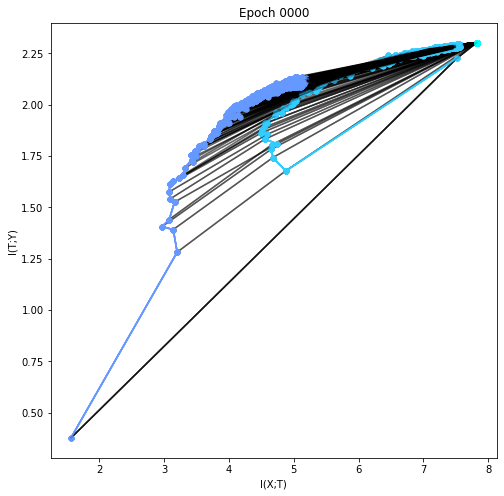

In [34]:
ax.set_title('Epoch 0000 - 2999')
fig # show full evolution process

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

And the model predicts a label as expected.